In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
# from torch.utils.data import Dataset, DataLoader
# from utils.PreProc_Data.DataProc_TM2 import StackedSequenceDataset
# import numpy as np
# import MZA_Experiment
# from MZA_Experiment import MZA_Experiment

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps") 
else:
    device = torch.device("cpu")

Grad testing

In [3]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)
d = torch.tensor([5., 2.], requires_grad=True)

In [4]:
Q = 3*a**3 - b**2
c = Q*d
Q.retain_grad()

In [5]:
external_grad = torch.tensor([1., 1.])

c.backward(gradient=external_grad, retain_graph= True)

In [6]:
Q.grad

tensor([5., 2.])

In [25]:
Q.grad = None
a.grad = None
b.grad = None
c.backward(gradient=external_grad,retain_graph = True)

print(a.grad)
print(b.grad)

tensor([180., 162.])
tensor([-60., -16.])


tensor([180., 162.])
tensor([-60., -16.])


DATA Testing

In [9]:
x = np.linspace(1,2,10)[:,np.newaxis]

mat = np.random.rand(10,2)
v = mat + x
v

array([[1.38036094, 1.24559389],
       [2.08566853, 1.70613543],
       [2.21472545, 2.16769596],
       [2.24136623, 1.51278402],
       [1.86766098, 2.17728907],
       [1.99159004, 2.08822817],
       [1.94668843, 2.00360665],
       [2.53154234, 2.63520368],
       [1.90518438, 2.35854218],
       [2.46656358, 2.53314358]])

In [65]:
def omega(x, h):
    return (x+h)**(0.5)

In [66]:
inp = torch.tensor(v, requires_grad=True)

out = torch.ones_like(inp[0])
for i in range(0,inp.shape[0]):
    out = omega(out,inp[i])
    print(out)

tensor([1.4270, 1.5199], dtype=torch.float64, grad_fn=<PowBackward0>)
tensor([1.6490, 1.8816], dtype=torch.float64, grad_fn=<PowBackward0>)
tensor([1.9378, 1.9254], dtype=torch.float64, grad_fn=<PowBackward0>)
tensor([2.0392, 1.8417], dtype=torch.float64, grad_fn=<PowBackward0>)
tensor([2.0294, 1.9109], dtype=torch.float64, grad_fn=<PowBackward0>)
tensor([2.0746, 2.0094], dtype=torch.float64, grad_fn=<PowBackward0>)
tensor([2.0601, 1.9832], dtype=torch.float64, grad_fn=<PowBackward0>)
tensor([1.9889, 2.0438], dtype=torch.float64, grad_fn=<PowBackward0>)
tensor([1.9867, 2.1574], dtype=torch.float64, grad_fn=<PowBackward0>)
tensor([2.2103, 2.2287], dtype=torch.float64, grad_fn=<PowBackward0>)


In [67]:
external_grad = torch.tensor([1., 1.])#torch.ones_like(inp))
out.backward(gradient=external_grad)

In [68]:
print(inp.grad.shape)
inp.grad

torch.Size([10, 2])


tensor([[1.3864e-06, 1.2869e-06],
        [3.9569e-06, 3.9120e-06],
        [1.3050e-05, 1.4721e-05],
        [5.0576e-05, 5.6687e-05],
        [2.0626e-04, 2.0880e-04],
        [8.3718e-04, 7.9798e-04],
        [3.4735e-03, 3.2069e-03],
        [1.4312e-02, 1.2720e-02],
        [5.6930e-02, 5.1994e-02],
        [2.2621e-01, 2.2435e-01]], dtype=torch.float64)

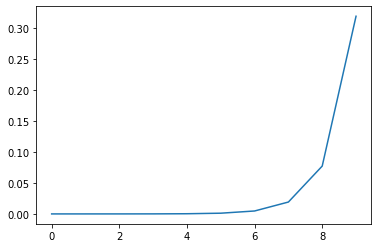

In [69]:
n = torch.norm(inp.grad, dim = -1)

plt.plot(n)